In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_sylvester
import os
import pandas
import scipy

os.chdir('/Users/sreelakshmirajendrakumar/Downloads')

#reading the data from the file and gettin gthe values of X and Y
dataset = pandas.read_csv('project3_F2019_Q1.2.csv')
X=dataset.iloc[:,0:3]
X=X.to_numpy() # Nxd matrix (N=150,d=3)
Y=dataset.iloc[:,3:203] 
Y=Y.to_numpy() # Nxq matrix (N=150,q=200)
q=200
d=3
N=150
tempX=np.ones((N,1)) # 150x1=Nx1 array
LambdaOne=10
LambdaTwo=1000
X=np.concatenate((tempX,X),axis=1) # Nx(d+1)

DOne=np.eye(q)
DTwo=np.random.rand(q,q)
for i in range(0,q):
    for j in range(0,q):
        if i==j:
            if i==0 or i==q-1:
                DTwo[i][j]=1
            else:
                DTwo[i][j]=2
        else:
            DTwo[i][j]=-1

In [6]:
def sylvesterEquation(x,y,D,Lambda): #AX+XB=Q
    Q=np.matmul(x.T,y) # (d+1)xq
    A=np.matmul(x.T,x) # (d+1)x(d+1)
    B=np.multiply(Lambda,D) # qxq
    beta=scipy.linalg.solve_sylvester(A,B,Q) # (d+1)xq
    return beta

betaOne=sylvesterEquation(X,Y,DOne,LambdaOne) # 4x200
betaTwo=sylvesterEquation(X,Y,DTwo,LambdaTwo)



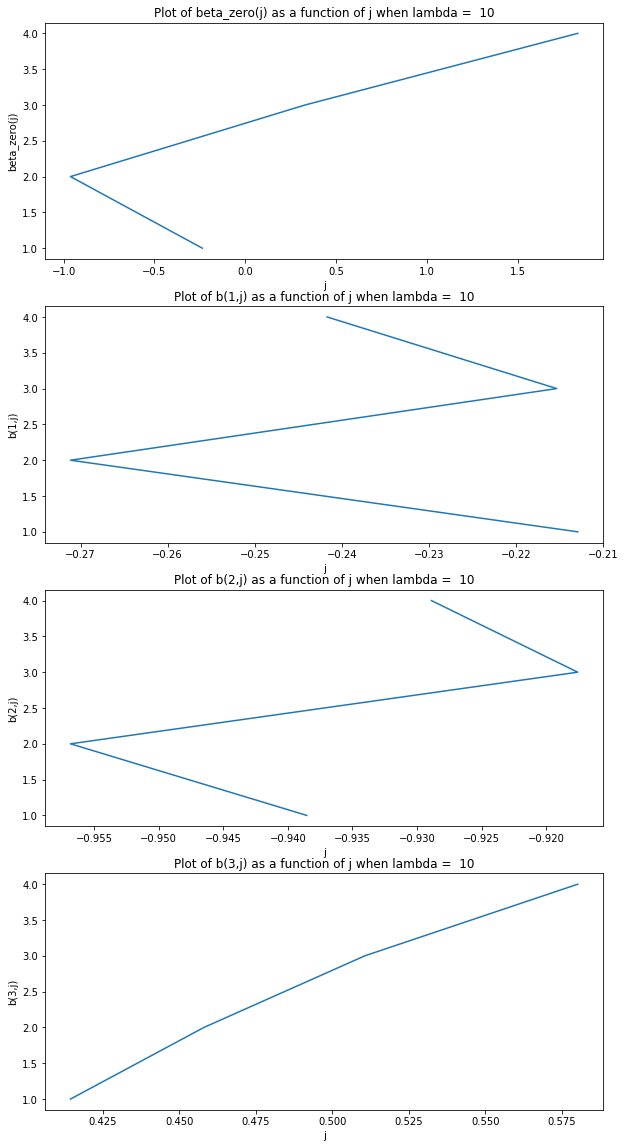

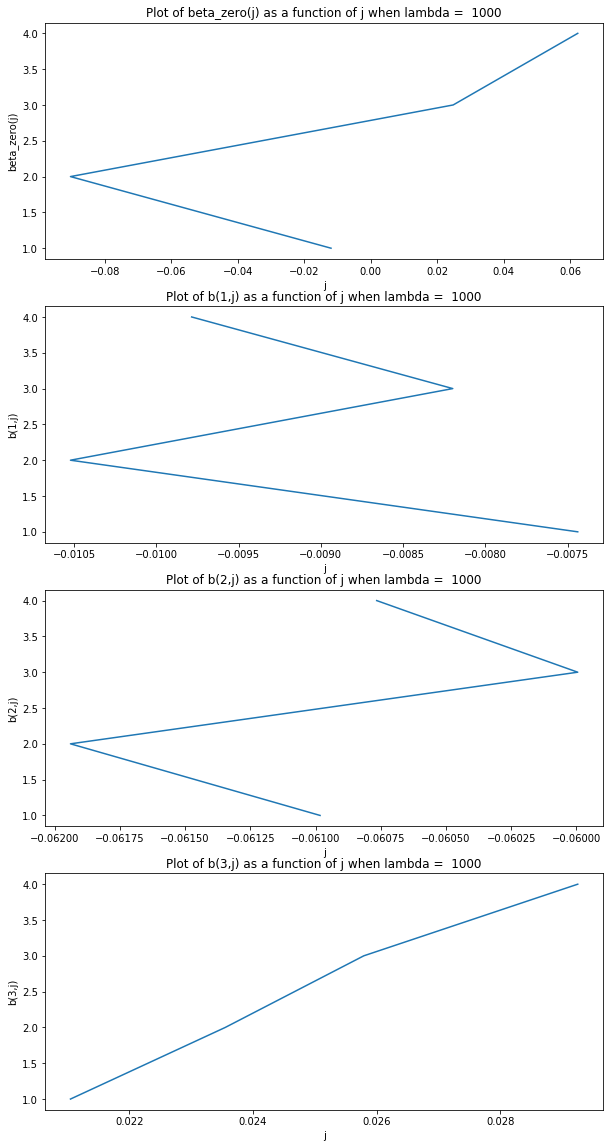

The optimal value of beta_zero when lambda=10 is

[-0.23662049 -0.9622287   0.32893551  1.82835385]


The optimal value of b when lambda=10 is

[[-0.21290721 -0.27116415 -0.2153196  -0.24168857]
 [-0.93853564 -0.95682694 -0.91756666 -0.92889269]
 [ 0.41444854  0.45804737  0.51060469  0.5801437 ]
 [ 1.84192819  1.85726189  1.88638962  1.86394095]]


The optimal value of beta_zero when lambda=1000 is

[-0.01199027 -0.09037196  0.02475292  0.06223291]


The optimal value of b when lambda=10 is

[[-0.00743928 -0.01052133 -0.00819854 -0.00978506]
 [-0.06098267 -0.06193919 -0.05999521 -0.06076568]
 [ 0.02104997  0.02355207  0.02579121  0.02924947]
 [ 0.04331232  0.0442456   0.04569805  0.04490587]]




In [8]:
#plot betaZero(j),b(1,j),b(2,j),b(3,j) as a function of j
#plotting betaZero(j)
def plotAll(Beta,Lambda):
    BetaZero=Beta[:,0]
    B=Beta[:,1:(len(Beta)+1)] # separating b and beta_zero from beta

    fig=plt.figure(figsize=(10,20))
    plt.subplot(4,1,1)
    J=np.arange(1,len(BetaZero)+1)
    plt.plot(BetaZero,J)
    plt.title('Plot of beta_zero(j) as a function of j when lambda =  '+str( Lambda ))
    plt.xlabel('j')
    plt.ylabel('beta_zero(j)')
    
    plt.subplot(4,1,2)
    plt.plot(B[0],J)
    plt.title('Plot of b(1,j) as a function of j when lambda =  '+str( Lambda ))
    plt.xlabel('j')
    plt.ylabel('b(1,j)')
    
    plt.subplot(4,1,3)
    plt.plot(B[1],J)
    plt.title('Plot of b(2,j) as a function of j when lambda =  '+str( Lambda ))
    plt.xlabel('j')
    plt.ylabel('b(2,j)')
    
    plt.subplot(4,1,4)
    plt.plot(B[2],J)
    plt.title('Plot of b(3,j) as a function of j when lambda =  '+str( Lambda ))
    plt.xlabel('j')
    plt.ylabel('b(3,j)')
    plt.show()
    return BetaZero,B
    
betaZeroOne,bOne=plotAll(betaOne,LambdaOne)
betaZeroTwo,bTwo=plotAll(betaTwo,LambdaTwo)

print('The optimal value of beta_zero when lambda=10 is\n')
print(betaZeroOne)
print('\n')

print('The optimal value of b when lambda=10 is\n')
print(bOne)
print('\n')

print('The optimal value of beta_zero when lambda=1000 is\n')
print(betaZeroTwo)
print('\n')

print('The optimal value of b when lambda=10 is\n')
print(bTwo)
print('\n')